# Step 1: Cargando los datos y las librerías

"Sobre Cocinar Pizzas"

Success is a lousy teacher. It seduces smart people into thinking they can't lose.
 --- Bill Gates

In [ ]:
# Limpiamos el entorno
rm(list = ls())
gc(verbose = FALSE)

In [2]:
# Librerías necesarias
require("data.table")
require("rpart")
require("ggplot2")
require("ROCR")
require("lubridate")
require("lhs")
require("DiceKriging")
require("mlrMBO")

Loading required package: data.table

Loading required package: rpart

Loading required package: ggplot2

Loading required package: ROCR

Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: lhs

Loading required package: DiceKriging

Loading required package: mlrMBO

Loading required package: mlr

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


Attaching package: 'mlr'


The following object is masked from 'package:ROCR':

    performance


Loading required package: 

In [3]:
# Aqui se debe poner la carpeta de la materia de SU computadora local
setwd("C:/Users/German/Desktop/dmeyf2023/German/Clase 1") # Establezco el Working Directory

# Poner sus semillas
semillas <- c(279511, 279523, 279541, 279551, 279571)

In [5]:
# Cargamos el dataset
dataset <- fread("competencia_01.csv")

# Nos quedamos solo con el 202103
dataset <- dataset[foto_mes == 202103]

In [6]:
# Creamos una clase binaria
dataset[, clase_binaria := ifelse(
                            clase_ternaria == "BAJA+2",
                                "evento",
                                "noevento"
                            )]
# Borramos el target viejo
dataset[, clase_ternaria := NULL]

In [7]:
# Seteamos nuestra primera semilla
set.seed(semillas[1])

# Particionamos de forma estratificada
in_training <- caret::createDataPartition(dataset$clase_binaria,
                     p = 0.70, list = FALSE)
dtrain  <-  dataset[in_training, ]
dtest   <-  dataset[-in_training, ]

# Step 2: Nuestra pizza: Un modelo

In [8]:
# Calculamos cuanto tarda un modelo "promedio" entrenar.
start_time <- Sys.time()
modelo <- rpart(clase_binaria ~ .,
                data = dtrain,
                xval = 0,
                cp = 0,
                minsplit = 20,
                minbucket = 10,
                maxdepth = 10)
pred_testing <- predict(modelo, dtest, type = "prob")
end_time <- Sys.time()
model_time <- end_time - start_time
print("Tiempo de ajuste en train y predict en test")
print(model_time)

ganancia <- function(probabilidades, clase) {
  return(sum(
    (probabilidades >= 0.025) * ifelse(clase == "evento", 273000, -7000))
  )
}

print("La ganancia NORMALIZADA de nuestro modelo es:")
print(ganancia(pred_testing[, "evento"], dtest$clase_binaria) / 0.3)

[1] "Tiempo de ajuste en train y predict en test"
Time difference of 7.745408 secs
[1] "La ganancia NORMALIZADA de nuestro modelo es:"
[1] 71726667


**Preguntas**
- ¿Es acaso este el mejor modelo posible?
- ¿Dónde lo buscamos el mejor modelo?
- ¿Qué parámetros conoce para un árbol de decisión?
- ¿Qué espacios de búsqueda tienen los parámetros *maxdepth* y *minsplit*?
- ¿Cómo se imagina la interacción entre esto dos últimos parámetros?

# Step 3: There Ain't No Such Thing As A Free Lunch

In [9]:
# Supongamos que sólo vamos a buscar sobre los parámetros *maxdepth* y
# *minsplit*

# Tamaño del espacio de búsqueda de *maxdepth*
n_md <- 30 - 4
# Tamaño del espacio de búsqueda de *minsplit*
n_ms <- 200 - 2
# Cantidad de semillas
n_seeds <- 5

# Estimación de cuanto tardaría en buscar el mejor modelo con 2 parámetros.
print(seconds_to_period(n_md * n_ms * n_seeds * model_time))

# Tamaño del espacio de búsqueda de *minbucket*
n_mb <- 100 - 2

# Estimación de cuanto tardaría en buscar el mejor modelo con 3 parámetros.
print(seconds_to_period(n_md * n_ms * n_seeds * model_time * n_mb))

[1] "2d 7H 22M 46.8034172058105S"
[1] "226d 3H 12M 26.7348861694336S"


**Preguntas**
- ¿Dispone del tiempo para realizar esta búsqueda?
- ¿Qué hacemos cuándo un parámetro tiene valores continuos?

# Step 4: Empezando a probar con menos casos

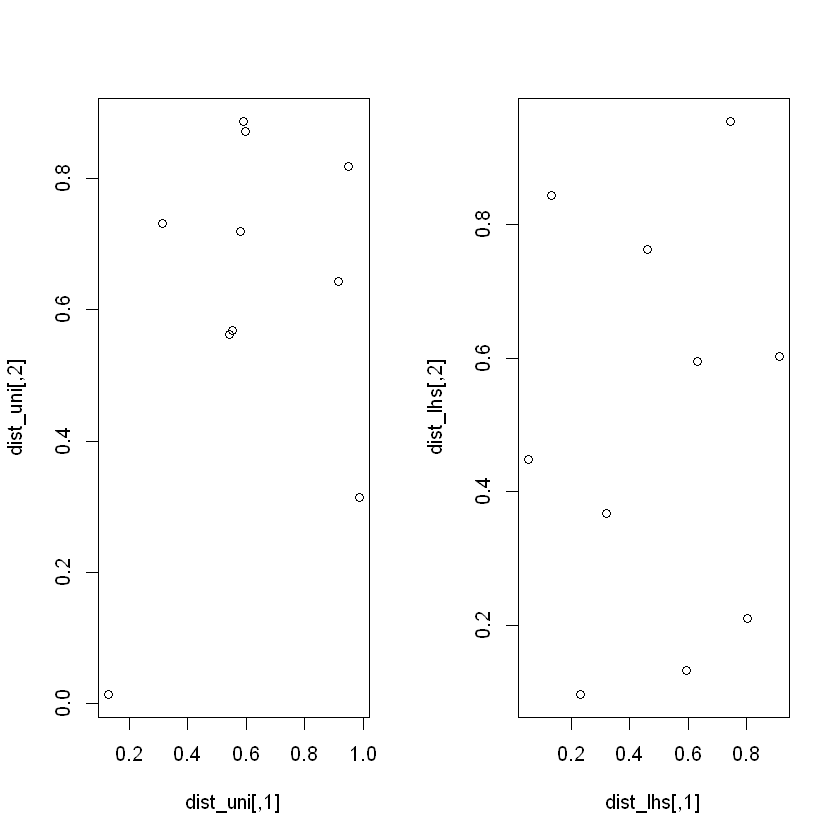

In [10]:
set.seed(semillas[1])
dist_uni <- matrix(runif(20), 10, 2)

# LHS Latin hypercube sampling
set.seed(semillas[1])
dist_lhs <- optimumLHS(10, 2)

par(mfrow = c(1, 2))
plot(dist_uni)
plot(dist_lhs)

**Preguntas**
- ¿Cuál distribución considera mejor? Justifique

# Step 5:

# Step 6:

# Step 7:

# Step 8:


# Step 9: